In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt


## CIFAR-10
El dataset consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.
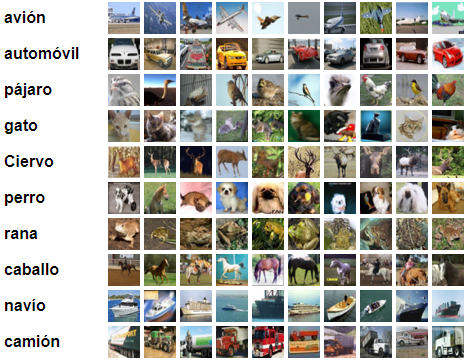


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


[4]


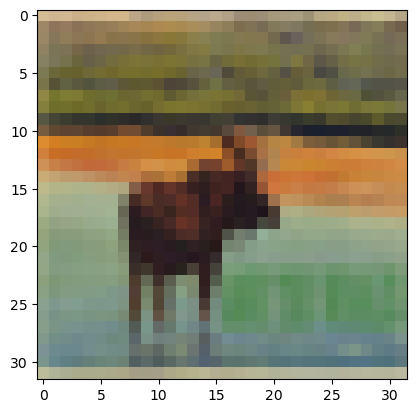

In [3]:
print(y_train[66])
plt.imshow(x_train[66])

In [4]:
#volver etiquetas a categoricos
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Escalar el set
x_train /= 255
x_test /= 255

## Conv2D

parametros: 

-filters: el número de filtros utilizados por ubicación. En otras palabras, la profundidad de la salida.

-kernel_size: una tupla (x,y) que proporciona la altura y el ancho del kernel que se utilizará

-strides: y tupla (x,y) que da la zancada en cada dimensión. El valor predeterminado es (1,1)

-input_shape: requerido solo para la primera capa

## MaxPooling2D

-pool_size: el tamaño (x,y) de la cuadrícula que se va a agrupar.

-strides:  se supone que es el tamaño del grupo a menos que se especifique lo contrario

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [8]:
batch_size = 32

# Iniciar el optimizador RMSprop sin el parámetro de decay
opt = RMSprop(lr=0.0005)


# Crear un generador de datos
datagen = ImageDataGenerator()

# Inicializar y compilar el modelo (si no lo has hecho ya)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Entrenar el modelo utilizando el generador de datos
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=5, validation_data=(x_test, y_test), shuffle=True)


Epoch 1/5
1563/1563 [==============================] - 604s 385ms/step - loss: 1.5650 - accuracy: 0.4336 - val_loss: 1.1162 - val_accuracy: 0.6048
Epoch 2/5
1563/1563 [==============================] - 597s 382ms/step - loss: 1.1582 - accuracy: 0.5923 - val_loss: 1.0404 - val_accuracy: 0.6345
Epoch 3/5
1563/1563 [==============================] - 594s 380ms/step - loss: 1.0159 - accuracy: 0.6463 - val_loss: 0.9088 - val_accuracy: 0.6848
Epoch 4/5
1563/1563 [==============================] - 594s 380ms/step - loss: 0.9425 - accuracy: 0.6758 - val_loss: 0.9787 - val_accuracy: 0.6613
Epoch 5/5
1563/1563 [==============================] - 563s 360ms/step - loss: 0.9151 - accuracy: 0.6911 - val_loss: 0.9158 - val_accuracy: 0.6962


In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Accuracy: 0.6962000131607056 
 Error: 30.379998683929443


In [12]:


predictions = model.predict(x_test)


313/313 [==============================] - 44s 139ms/step


preduction: 2
y test: 2


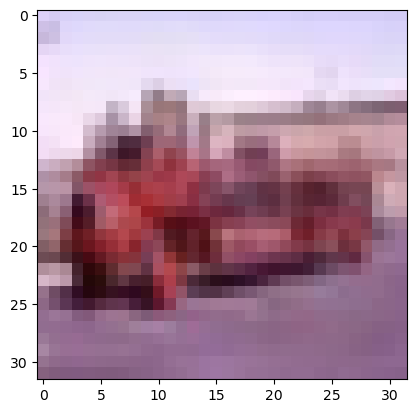

In [16]:
i=67
print("preduction:", predictions[i].argmax())
plt.imshow(x_train[i])
print("y test:", y_test[i].argmax())